In [1]:
%matplotlib inline   
import statsmodels.api as sm 
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import time
import requests, re, sqlite3
from bs4 import BeautifulSoup
import nltk
from nltk import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.downloader.download('vader_lexicon')
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch


main_url = "https://www.footballbootsdb.com/search/?page=$NUM$"
page_url = ""
response=requests.get(main_url)
soup = BeautifulSoup(response.text, 'html.parser')
soup_string = str(soup)
pages = 914

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishanpanchaal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ishanpanchaal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ishanpanchaal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#DATABASE CONNECTION ESTABLISHED AND TABLE CREATED
conn = sqlite3.connect('football.db')
cursor = conn.cursor()
cursor.execute("CREATE TABLE Players(\
Name varchar(100),\
Club varchar(100),\
Boots varchar(100),\
Age varchar(100),\
Height varchar(100))")


conn = sqlite3.connect('football.db')
cursor = conn.cursor()

In [3]:
#WEBSITE CRAWLED AND DATA EXTRACTED AND STORED INTO DATABASE
regex = "<td><a href=.*?>(.*?)<\/a><\/td>\n<td><a href=.*?>(.*?)<\/a><\/td>\n<td><a href=.*?<\/span>(.*?)<\/a><\/td>\n<td .*?>(.*?)<\/td>\n<td .*?>(.*?)<\/td>"
matches=re.compile(regex,re.S|re.I).findall(soup_string)
query = """INSERT INTO Players Values (?, ?, ?, ?, ?)"""
cursor.executemany(query, matches)

for i in range(1, pages+1):
    #check last page
    last_page = re.compile(r'<a class="page current" href=.*?>(.*?)<\/a>', re.S|re.I).findall(soup_string)
    print(last_page)
    if last_page[0] == 915:
        break;
    else :
        page_url=main_url.replace("$NUM$",str(i+1))
        print("Collecting Data from: "+page_url)
        #time.sleep(1)
        response=requests.get(page_url)
        soup = BeautifulSoup(response.text, 'html.parser')
        soup_string = str(soup)
        regex = "<td><a href=.*?>(.*?)<\/a><\/td>\n<td><a href=.*?>(.*?)<\/a><\/td>\n<td><a href=.*?<\/span>(.*?)<\/a><\/td>\n<td .*?>(.*?)<\/td>\n<td .*?>(.*?)<\/td>"
        matches=re.compile(regex,re.S|re.I).findall(soup_string)
        query = """INSERT INTO Players Values (?, ?, ?, ?, ?)"""
        cursor.executemany(query, matches)
        
        
conn.commit()
cursor.close()
conn.close()

['1']
['2']
['3']
['4']
['5']
['6']
['7']
['8']
['9']
['10']
['11']
['12']
['13']
['14']
['15']
['16']
['17']
['18']
['19']
['20']
['21']
['22']
['23']
['24']
['25']
['26']
['27']
['28']
['29']
['30']
['31']
['32']
['33']
['34']
['35']
['36']
['37']
['38']
['39']
['40']
['41']
['42']
['43']
['44']
['45']
['46']
['47']
['48']
['49']
['50']
['51']
['52']
['53']
['54']
['55']
['56']
['57']
['58']
['59']
['60']
['61']
['62']
['63']
['64']
['65']
['66']
['67']
['68']
['69']
['70']
['71']
['72']
['73']
['74']
['75']
['76']
['77']
['78']
['79']
['80']
['81']
['82']
['83']
['84']
['85']
['86']
['87']
['88']
['89']
['90']
['91']
['92']
['93']
['94']
['95']
['96']
['97']
['98']
['99']
['100']
['101']
['102']
['103']
['104']
['105']
['106']
['107']


['108']
['109']
['110']
['111']
['112']
['113']
['114']
['115']
['116']
['117']
['118']
['119']
['120']
['121']
['122']
['123']
['124']
['125']
['126']
['127']
['128']
['129']
['130']
['131']
['132']
['133']
['134']
['135']
['136']
['137']
['138']
['139']
['140']
['141']
['142']
['143']
['144']
['145']
['146']
['147']
['148']
['149']
['150']
['151']
['152']
['153']
['154']
['155']
['156']
['157']
['158']
['159']
['160']
['161']
['162']
['163']
['164']
['165']
['166']
['167']
['168']
['169']
['170']
['171']
['172']
['173']
['174']
['175']
['176']
['177']
['178']
['179']
['180']
['181']
['182']
['183']
['184']
['185']
['186']
['187']
['188']
['189']
['190']
['191']
['192']
['193']
['194']
['195']
['196']
['197']
['198']
['199']
['200']
['201']
['202']
['203']
['204']
['205']
['206']
['207']
['208']
['209']
['210']
['211']


['212']
['213']
['214']
['215']
['216']
['217']
['218']
['219']
['220']
['221']
['222']
['223']
['224']
['225']
['226']
['227']
['228']
['229']
['230']
['231']
['232']
['233']
['234']
['235']
['236']
['237']
['238']
['239']
['240']
['241']
['242']
['243']
['244']
['245']
['246']
['247']
['248']
['249']
['250']
['251']
['252']
['253']
['254']
['255']
['256']
['257']
['258']
['259']
['260']
['261']
['262']
['263']
['264']
['265']
['266']
['267']
['268']
['269']
['270']
['271']
['272']
['273']
['274']
['275']
['276']
['277']
['278']
['279']
['280']
['281']
['282']
['283']
['284']
['285']
['286']
['287']
['288']
['289']
['290']
['291']
['292']
['293']
['294']
['295']
['296']
['297']
['298']
['299']
['300']
['301']
['302']
['303']
['304']
['305']
['306']
['307']
['308']
['309']
['310']
['311']
['312']
['313']
['314']
['315']


['316']
['317']
['318']
['319']
['320']
['321']
['322']
['323']
['324']
['325']
['326']
['327']
['328']
['329']
['330']
['331']
['332']
['333']
['334']
['335']
['336']
['337']
['338']
['339']
['340']
['341']
['342']
['343']
['344']
['345']
['346']
['347']
['348']
['349']
['350']
['351']
['352']
['353']
['354']
['355']
['356']
['357']
['358']
['359']
['360']
['361']
['362']
['363']
['364']
['365']
['366']
['367']
['368']
['369']
['370']
['371']
['372']
['373']
['374']
['375']
['376']
['377']
['378']
['379']
['380']
['381']
['382']
['383']
['384']
['385']
['386']
['387']
['388']
['389']
['390']
['391']
['392']
['393']
['394']
['395']
['396']
['397']
['398']
['399']
['400']
['401']
['402']
['403']
['404']
['405']
['406']
['407']
['408']
['409']
['410']
['411']
['412']
['413']
['414']
['415']
['416']
['417']
['418']
['419']


['420']
['421']
['422']
['423']
['424']
['425']
['426']
['427']
['428']
['429']
['430']
['431']
['432']
['433']
['434']
['435']
['436']
['437']
['438']
['439']
['440']
['441']
['442']
['443']
['444']
['445']
['446']
['447']
['448']
['449']
['450']
['451']
['452']
['453']
['454']
['455']
['456']
['457']
['458']
['459']
['460']
['461']
['462']
['463']
['464']
['465']
['466']
['467']
['468']
['469']
['470']
['471']
['472']
['473']
['474']
['475']
['476']
['477']
['478']
['479']
['480']
['481']
['482']
['483']
['484']
['485']
['486']
['487']
['488']
['489']
['490']
['491']
['492']
['493']
['494']
['495']
['496']
['497']
['498']
['499']
['500']
['501']
['502']
['503']
['504']
['505']
['506']
['507']
['508']
['509']
['510']
['511']
['512']
['513']
['514']
['515']
['516']
['517']
['518']
['519']
['520']
['521']
['522']
['523']


['524']
['525']
['526']
['527']
['528']
['529']
['530']
['531']
['532']
['533']
['534']
['535']
['536']
['537']
['538']
['539']
['540']
['541']
['542']
['543']
['544']
['545']
['546']
['547']
['548']
['549']
['550']
['551']
['552']
['553']
['554']
['555']
['556']
['557']
['558']
['559']
['560']
['561']
['562']
['563']
['564']
['565']
['566']
['567']
['568']
['569']
['570']
['571']
['572']
['573']
['574']
['575']
['576']
['577']
['578']
['579']
['580']
['581']
['582']
['583']
['584']
['585']
['586']
['587']
['588']
['589']
['590']
['591']
['592']
['593']
['594']
['595']
['596']
['597']
['598']
['599']
['600']
['601']
['602']
['603']
['604']
['605']
['606']
['607']
['608']
['609']
['610']
['611']
['612']
['613']
['614']
['615']
['616']
['617']
['618']
['619']
['620']
['621']
['622']
['623']
['624']
['625']
['626']
['627']


['628']
['629']
['630']
['631']
['632']
['633']
['634']
['635']
['636']
['637']
['638']
['639']
['640']
['641']
['642']
['643']
['644']
['645']
['646']
['647']
['648']
['649']
['650']
['651']
['652']
['653']
['654']
['655']
['656']
['657']
['658']
['659']
['660']
['661']
['662']
['663']
['664']
['665']
['666']
['667']
['668']
['669']
['670']
['671']
['672']
['673']
['674']
['675']
['676']
['677']
['678']
['679']
['680']
['681']
['682']
['683']
['684']
['685']
['686']
['687']
['688']
['689']
['690']
['691']
['692']
['693']
['694']
['695']
['696']
['697']
['698']
['699']
['700']
['701']
['702']
['703']
['704']
['705']
['706']
['707']
['708']
['709']
['710']
['711']
['712']
['713']
['714']
['715']
['716']
['717']
['718']
['719']
['720']
['721']
['722']
['723']
['724']
['725']
['726']
['727']
['728']
['729']
['730']
['731']


['732']
['733']
['734']
['735']
['736']
['737']
['738']
['739']
['740']
['741']
['742']
['743']
['744']
['745']
['746']
['747']
['748']
['749']
['750']
['751']
['752']
['753']
['754']
['755']
['756']
['757']
['758']
['759']
['760']
['761']
['762']
['763']
['764']
['765']
['766']
['767']
['768']
['769']
['770']
['771']
['772']
['773']
['774']
['775']
['776']
['777']
['778']
['779']
['780']
['781']
['782']
['783']
['784']
['785']
['786']
['787']
['788']
['789']
['790']
['791']
['792']
['793']
['794']
['795']
['796']
['797']
['798']
['799']
['800']
['801']
['802']
['803']
['804']
['805']
['806']
['807']
['808']
['809']
['810']
['811']
['812']
['813']
['814']
['815']
['816']
['817']
['818']
['819']
['820']
['821']
['822']
['823']
['824']
['825']
['826']
['827']
['828']
['829']
['830']
['831']
['832']
['833']
['834']
['835']


['836']
['837']
['838']
['839']
['840']
['841']
['842']
['843']
['844']
['845']
['846']
['847']
['848']
['849']
['850']
['851']
['852']
['853']
['854']
['855']
['856']
['857']
['858']
['859']
['860']
['861']
['862']
['863']
['864']
['865']
['866']
['867']
['868']
['869']
['870']
['871']
['872']
['873']
['874']
['875']
['876']
['877']
['878']
['879']
['880']
['881']
['882']
['883']
['884']
['885']
['886']
['887']
['888']
['889']
['890']
['891']
['892']
['893']
['894']
['895']
['896']
['897']
['898']
['899']
['900']
['901']
['902']
['903']
['904']
['905']
['906']
['907']
['908']
['909']
['910']
['911']
['912']
['913']
['914']


In [4]:
#DATAFRAME CREATED FROM SQL DATABASE
conn = sqlite3.connect('football.db')
cursor = conn.cursor()
query = 'SELECT * FROM Players'
df = pd.read_sql(query, conn)
df

,Name,Club,Boots,Age,Height
0,Lionel Messi,Paris Saint-Germain,X Speedportal Messi.1,35,170
1,Kylian Mbappé,Paris Saint-Germain,Zoom Mercurial Superfly 9,23,178
2,Cristiano Ronaldo,,Zoom Mercurial Superfly 9,37,187
3,Neymar,Paris Saint-Germain,Future Z 1.4,30,175
4,Luka Modric,Real Madrid,Mercurial Vapor 14,37,172
...,...,...,...,...,...
13699,Zsolt Korcsmár,,,33,189
13700,Zulechner,,Phantom GT2,32,182
13701,Zurab Ochigava,,,27,186
13702,Zvjezdan Misimović,,Predator Edge.1 Low,40,179


In [5]:
#DATA FRAME CLEANED
df = df[df.Boots != '']
df = df[df.Club != '']
df = df[df.Age != '']
df = df[df.Name != '']
df = df[df.Height != '']
df = df.reset_index(drop=True)
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'ID'})
df

,ID,Name,Club,Boots,Age,Height
0,0,Lionel Messi,Paris Saint-Germain,X Speedportal Messi.1,35,170
1,1,Kylian Mbappé,Paris Saint-Germain,Zoom Mercurial Superfly 9,23,178
2,2,Neymar,Paris Saint-Germain,Future Z 1.4,30,175
3,3,Luka Modric,Real Madrid,Mercurial Vapor 14,37,172
4,4,Antoine Griezmann,Atlético de Madrid,Ultra Ultimate,31,176
...,...,...,...,...,...,...
4094,4094,Zeno Debast,Anderlecht,Zoom Mercurial Vapor 15,19,189
4095,4095,Zinédine Ould Khaled,Angers SCO,X Speedportal+,22,195
4096,4096,Zito Luvumbo,Cagliari Calcio,Zoom Mercurial Vapor 15,20,171
4097,4097,Zoran Popovic,Red Star Belgrade,Tiempo Legend VII,34,188


In [6]:
#CONVERSION OF DATATYPES FOR ANALYSIS
df['Age'] = df['Age'].astype(int)
df['Height'] = df['Height'].astype(int)
df['Boots'] = df['Boots'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Club'] = df['Club'].astype(str)


In [7]:
#DESCRIPTIVE ANALYSIS
print(df.describe(),"\n")
print("Unique Age values are :", df['Age'].unique(),"\n")
print("Unique Hieght values are :", df['Height'].unique(),"\n")

                ID          Age       Height
count  4099.000000  4099.000000  4099.000000
mean   2049.000000    26.504269   182.782874
std    1183.423705     4.516676     6.651375
min       0.000000    16.000000   160.000000
25%    1024.500000    23.000000   178.000000
50%    2049.000000    26.000000   183.000000
75%    3073.500000    30.000000   188.000000
max    4098.000000    44.000000   206.000000 

Unique Age values are : [35 23 30 37 31 29 22 34 19 21 18 24 32 25 33 36 20 28 27 41 26 38 39 17
 44 16 40] 

Unique Hieght values are : [170 178 175 172 176 188 195 185 186 173 181 183 184 187 193 171 192 174
 177 180 179 182 189 194 200 191 190 168 165 197 196 167 169 198 201 163
 202 160 199 164 166 206] 



(array([ 64., 510., 907., 979., 558., 643., 329.,  83.,  25.,   1.]),
 array([16. , 18.8, 21.6, 24.4, 27.2, 30. , 32.8, 35.6, 38.4, 41.2, 44. ]),
 <BarContainer object of 10 artists>)

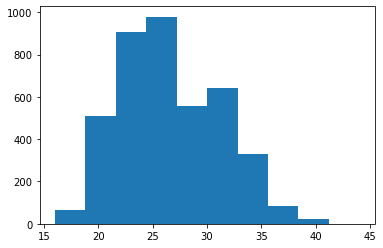

In [8]:
#HISTOGRAM OF AGE 
plt.hist(df['Age'])

(array([   6.,   76.,  315.,  726.,  751., 1176.,  782.,  218.,   46.,
           3.]),
 array([160. , 164.6, 169.2, 173.8, 178.4, 183. , 187.6, 192.2, 196.8,
        201.4, 206. ]),
 <BarContainer object of 10 artists>)

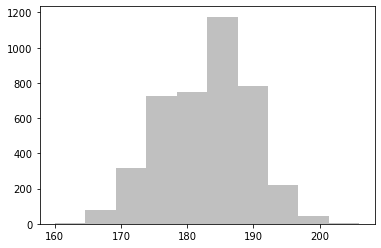

In [9]:
#HISTOGRAM OF HEIGHT 
plt.hist(df['Height'], color = 'silver')

<AxesSubplot:xlabel='Age', ylabel='Height'>

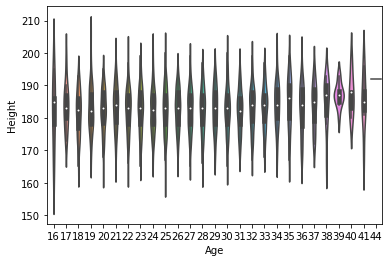

In [10]:
#VIOLIN PLOT GRAPH FOR AGE||HEIGHT (EXTRA)
sns.violinplot(x="Age", y="Height", data=df)

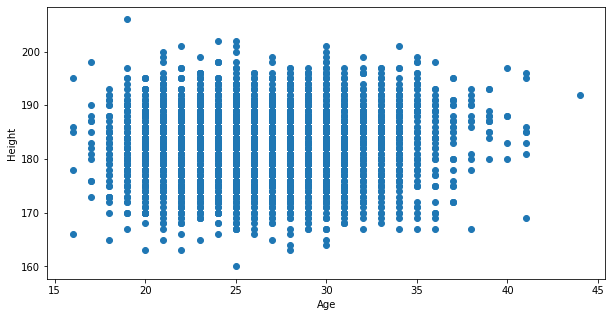

In [11]:
#REGRESSION ANALYSIS AGE VS HEIGHT

y=df['Height']
x=df['Age']
plt.figure(figsize = (10,5))
ax = plt.axes()
ax.set_ylabel("Height")
ax.set_xlabel("Age")
ax.scatter(x,y)

LinearRegression()
-------------------------------------
[180.91719138]
-------------------------------------
Coefficient is =  [[0.07039177]]
-------------------------------------
R-Square is =  0.002284855598357227
-------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.382
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00220
Time:                        19:26:52   Log-Likelihood:                -13578.
No. Observations:                4099   AIC:                         2.716e+04
Df Residuals:                    4097   BIC:                         2.717e+04
Df Model:                           1                                         
Covariance Type:            nonrob

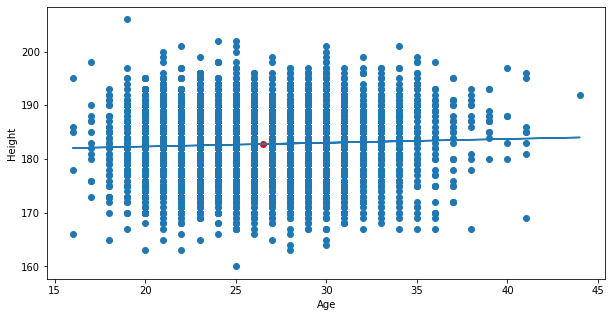

In [12]:
#LINEAR REGRESSION AND OLS REGRESSION

y=df[['Height']].to_numpy()
x=df[['Age']].to_numpy()
plt.figure(figsize = (10,5))
model = LinearRegression()
print(model.fit(x, y))
print("-------------------------------------")
print(model.intercept_)
print("-------------------------------------")
print("Coefficient is = ", model.coef_)
print("-------------------------------------")
print("R-Square is = ", model.score(x, y))
print("-------------------------------------")

y_est = model.predict(x)
ax=plt.axes()
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.scatter(x, y)
ax.plot(x,y_est)
x=sm.add_constant(x)
model_ols=sm.OLS(y,x)
results=model_ols.fit()
print(results.summary())


x_new = np.asarray([26.5])
y_pred=model.predict(x_new.reshape(1,-1)) # reshape to (1,-1) for a single data point
print("Estimated Murder Rate for the new data:", y_pred)
ax.scatter(x_new,y_pred,color='red')

None


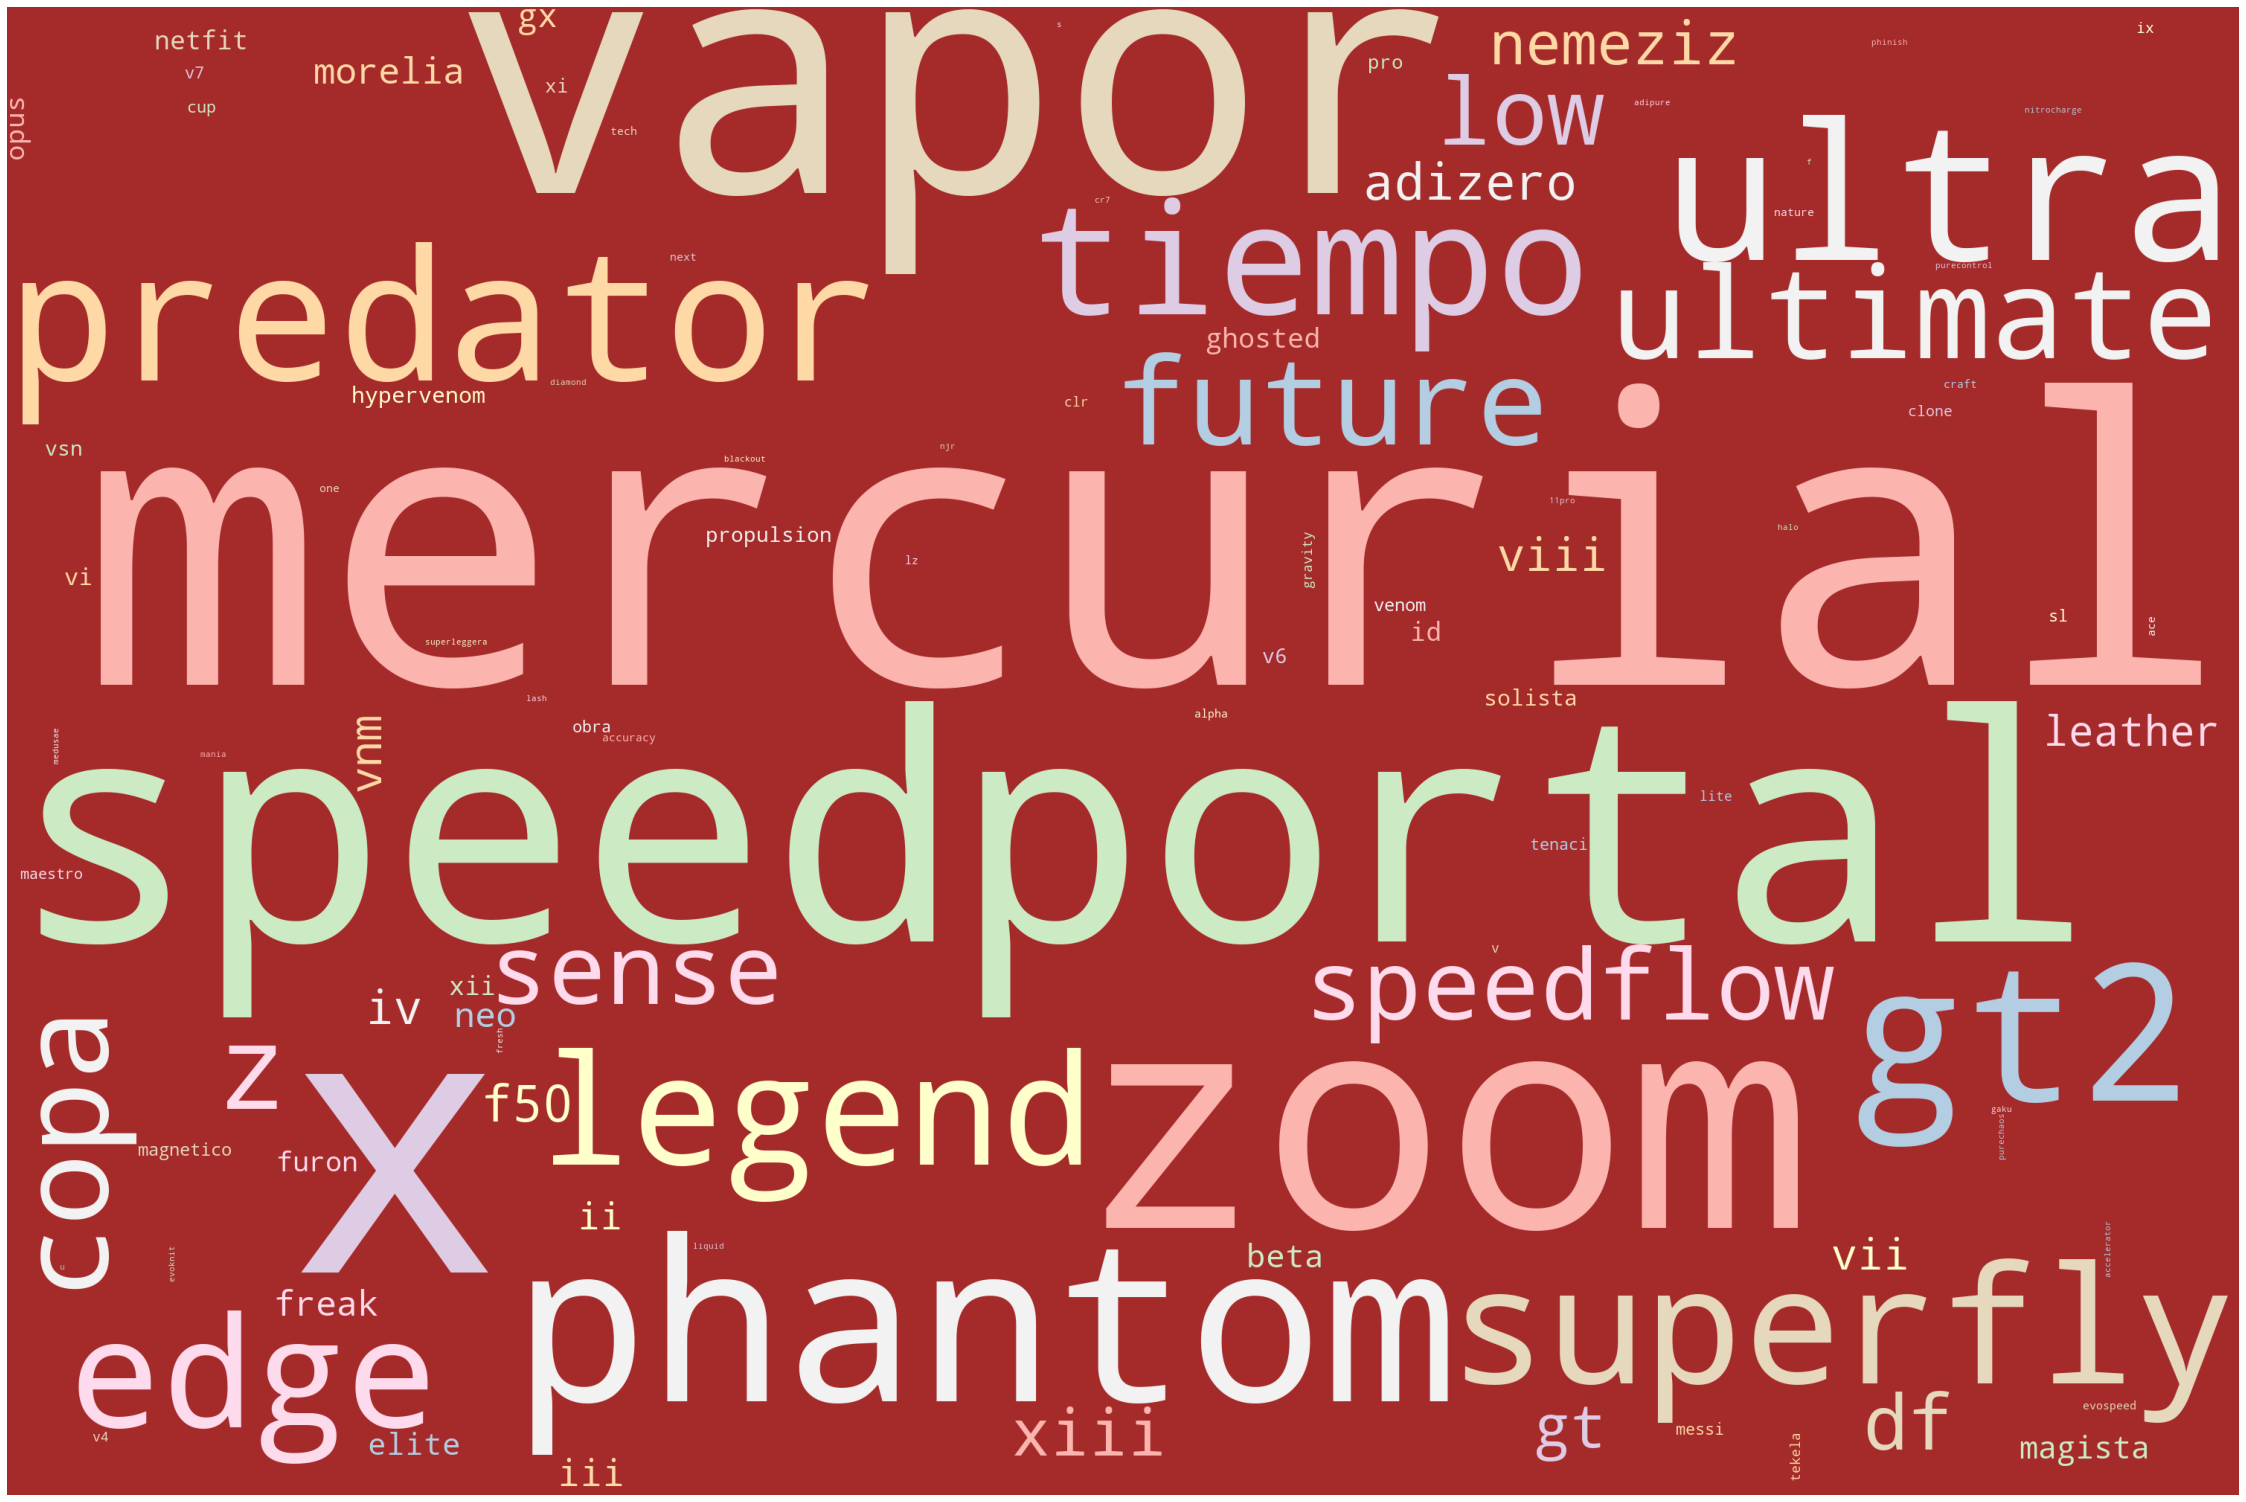

In [26]:
#TEXT ANALYISIS
with open("boots.txt", "w") as f_out:
    f_out.write(" ".join(df["Boots"].str.lower()))
    
#open text file in read mode
text_file = open("boots.txt", "r")

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
#read whole file to a string
text = text_file.read()
#text

#GENERATE WORDCLOUD
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='brown', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

# Plot
print(plot_cloud(wordcloud))

In [14]:
#SENTIMENT ANALYSIS ON NAMES OF BOOTS 

#ANALYSIS USING VADER ANALYSIS

print("VADER ANALYSIS STARTS HERE \n ------------------------------------------")
sia = SentimentIntensityAnalyzer()
res ={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    boots = row['Boots']
    Id= row['ID']
    res[Id]=sia.polarity_scores(boots)
res

vaders= pd.DataFrame(res).T

#PRINTING RESULT OF VADER ANALYSIS
print("RESULT OF VADER ANALYISIS IS : \n")
print(vaders, "\n ------------------------------------------")

#USING ROBERTA ANALYSIS

print("ROBERTA ANALYSIS STARTS HERE \n ------------------------------------------")
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
print(tokenizer, "\n")

examle = df['Boots'][50]
def polarity_scores_roberta(example) :
    encoded_text= tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

res ={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    boots = row['Boots']
    Id= row['ID']
    vader_result=sia.polarity_scores(boots)
    roberta_result = polarity_scores_roberta(boots)
    both = {**vader_result,**roberta_result}
    res[Id] = both
    
#PRINTING RESULT OF ROBERTA ANALYISIS  
print("RESULT OF ROBERTA ANALYISIS IS : \n")
print(roberta_result)
print(both)

VADER ANALYSIS STARTS HERE 
 ------------------------------------------


  0%|          | 0/4099 [00:00<?, ?it/s]

RESULT OF VADER ANALYISIS IS : 

      neg  neu  pos  compound
0     0.0  1.0  0.0       0.0
1     0.0  1.0  0.0       0.0
2     0.0  1.0  0.0       0.0
3     0.0  1.0  0.0       0.0
4     0.0  1.0  0.0       0.0
...   ...  ...  ...       ...
4094  0.0  1.0  0.0       0.0
4095  0.0  1.0  0.0       0.0
4096  0.0  1.0  0.0       0.0
4097  0.0  1.0  0.0       0.0
4098  0.0  1.0  0.0       0.0

[4099 rows x 4 columns] 
 ------------------------------------------
ROBERTA ANALYSIS STARTS HERE 
 ------------------------------------------
PreTrainedTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment', vocab_size=50265, model_max_len=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}) 



  0%|          | 0/4099 [00:00<?, ?it/s]

RESULT OF ROBERTA ANALYISIS IS : 

{'roberta_neg': 0.057016548, 'roberta_neu': 0.84612775, 'roberta_pos': 0.096855685}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'roberta_neg': 0.057016548, 'roberta_neu': 0.84612775, 'roberta_pos': 0.096855685}


In [15]:
#COMPARING THE RESULTS OF VADER ANALYSIS AND ROBERTA ANALYSIS

vaders= pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'ID'})

vaders = vaders.merge(df, how = 'left')
print(vaders)

print("-----------------------------------------------------------")




        ID  neg  neu  pos  compound  roberta_neg  roberta_neu  roberta_pos  \
0        0  0.0  1.0  0.0       0.0     0.052809     0.834081     0.113110   
1        1  0.0  1.0  0.0       0.0     0.015537     0.881306     0.103157   
2        2  0.0  1.0  0.0       0.0     0.046867     0.839751     0.113383   
3        3  0.0  1.0  0.0       0.0     0.077262     0.797379     0.125359   
4        4  0.0  1.0  0.0       0.0     0.156004     0.664534     0.179462   
...    ...  ...  ...  ...       ...          ...          ...          ...   
4094  4094  0.0  1.0  0.0       0.0     0.048767     0.846682     0.104550   
4095  4095  0.0  1.0  0.0       0.0     0.010524     0.834183     0.155293   
4096  4096  0.0  1.0  0.0       0.0     0.048767     0.846682     0.104550   
4097  4097  0.0  1.0  0.0       0.0     0.087212     0.816392     0.096396   
4098  4098  0.0  1.0  0.0       0.0     0.057017     0.846128     0.096856   

                      Name                 Club                

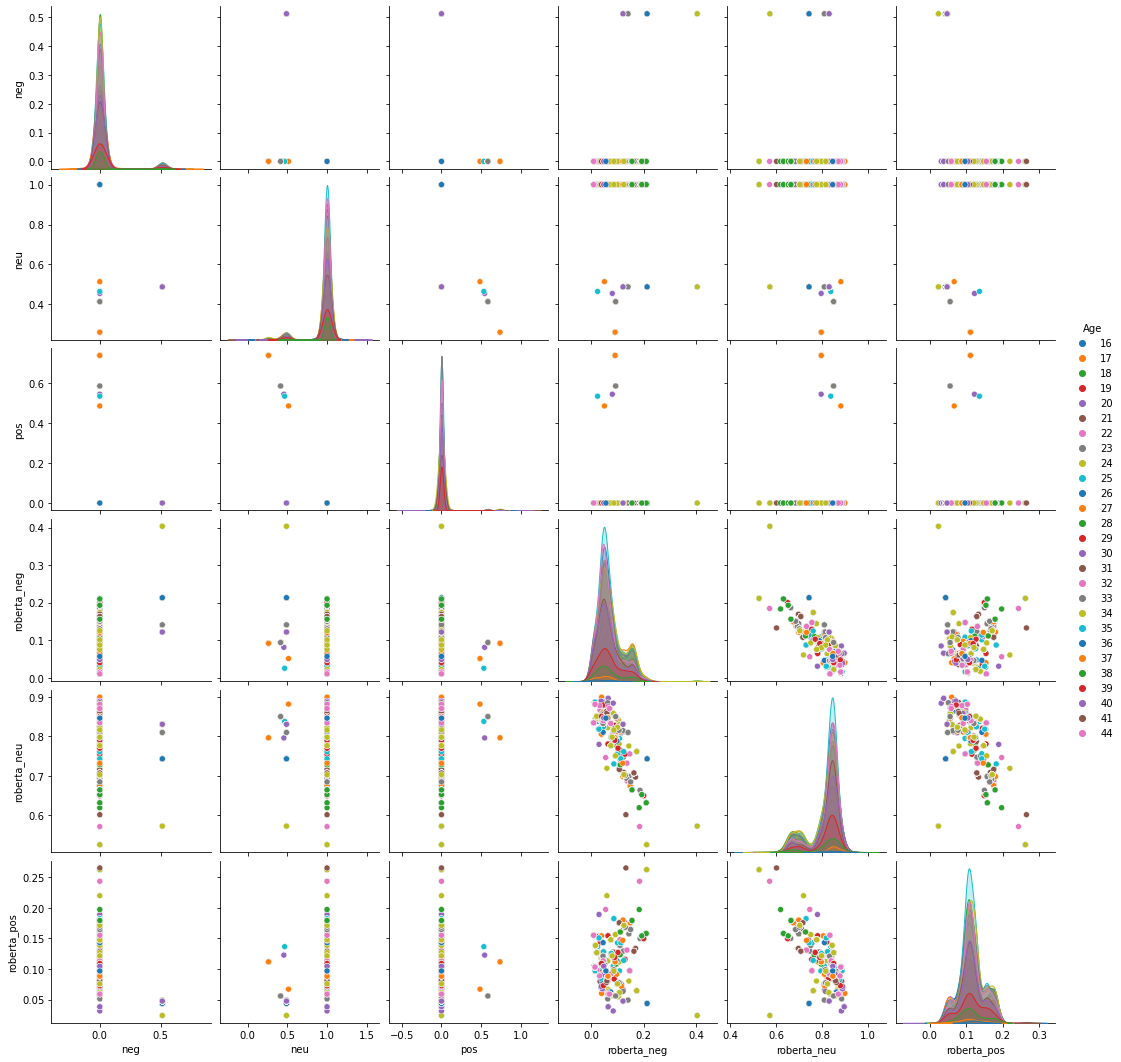

None


In [23]:
sns.pairplot(data = vaders, vars = ['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'Age', palette = 'tab10')
print(plt.show())

In [17]:
#POS TAGGING DONE HERE
for i in range (0, len(df)):
    chaddi = df['Boots'][i]
    tokens = word_tokenize(chaddi)
    print(tokens)
    tagged_tokens = nltk.pos_tag(tokens)
    print(tagged_tokens, "\n \n")
    


['X', 'Speedportal', 'Messi.1']
[('X', 'NNP'), ('Speedportal', 'NNP'), ('Messi.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Phantom', 'GX']
[('Phantom', 'NNP'), ('GX', 'NNP')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Predator', 'Edge.1', 'Low']
[('Predator', 'NNP'), ('Edge.1', 'NNP'), ('Low', 'NNP')] 
 

['Furon', 'v7']
[('Furon', 'NNP'), ('v7', 'NN')] 
 

['Phantom', 'GT2']
[('Pha

[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Phantom', 'GT2', 'DF']
[('Phantom', 'NNP'), ('GT2', 'NNP'), ('DF', 'NNP')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['Phantom', 'VNM']
[('Phantom', 'NNP'), ('VNM', 'NNP')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Phantom', 'Ultra', 'Venom']
[('Phantom', 'NNP'), ('Ultra', 'NNP'), ('Venom', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Merc

[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Phantom', 'VNM']
[('Phantom', 'NNP'), ('VNM', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['F50', 'X', 'Ghosted', 'Adizero']
[('F50', 'NNP'), ('X', 'NNP'), ('Ghosted', 'NNP'), ('Adizero', 'NNP')] 
 

['F50', 'Adizero', 'IV', 'Leather']
[('F50', 'NNP'), ('Adizero', 'NNP'), ('IV', 'NNP'), ('Leather', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['F50', 'X', 'Ghosted', 'Adizero']
[('F50', 'NNP'), ('X', 'NNP'), ('Ghosted', 'NNP'), ('Adizero', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Predator', 'Edge.1']
[('Predator', 'NNP'), ('Edge.1', 'NNP')] 
 

['Nemeziz.1']
[('Nemeziz.1', 'NN')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Va

[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Nemeziz.1']
[('Nemeziz.1', 'NN')] 
 

['Mercurial', 'Vapor', 'XIII']
[('Mercurial', 'JJ'), ('Vapor', 'NNP'), ('XIII', 'NN')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Future', 'Z', '1.4']
[('

[('F50', 'NNP'), ('Adizero', 'NNP'), ('IV', 'NNP'), ('Leather', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Predator', 'Edge.1', 'Low']
[('Predator', 'NNP'), ('Edge.1', 'NNP'), ('Low', 'NNP')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Mercurial', 'Vapor', 'XIII']
[('Mercurial', 'JJ'), ('Vapor', 'NNP'), ('XIII', 'NN')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Ultra', '1.3']
[('Ultra', 'NNP'), ('1.3', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Ultra', '1.3']
[('Ultra', 'NNP'), ('1.3', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoo

[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Furon', 'v6+']
[('Furon', 'NNP'), ('v6+', 'NN')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Ultra', '1.4']
[('Ultra', 'NNP'), ('1.4', 'CD')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Future', 'Z', '1.4']
[('F

[('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('VIII', 'NNP'), ('Elite', 'NNP'), ('iD', 'NN')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Mercurial', 'Superfly', '8']
[('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('8', 'CD')] 
 

['Predator', 'Edge.1']
[('Predator', 'NNP'), ('Edge.1', 'NNP')] 
 

['Ultra', '1.3']
[('Ultra', 'NNP'), ('1.3', 'CD')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercuria

[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Predator', 'Freak.1', 'Low']
[('Predator', 'NNP'), ('Freak.1', 'NNP'), ('Low', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['CLR', '900']
[('CLR', 'NNP'), ('900', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['X', '19.1']
[('X', '$'), ('19.1', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['F50', 'Adizero']
[('F50', 'NNP'), ('Adizero', 'NNP')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Phantom', 

[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['X', 'Speedflow+']
[('X', 'NN'), ('Speedflow+', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Magista', 'Opus', 'II']
[('Magista', 'NNP'), ('Opus', 'NNP'), ('II', 'NNP')] 
 

['Copa', 'Sense+']
[('Copa', 'NNP'), ('Sense+', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Ultra', '1.4']
[('Ultra', 'NNP'), ('1.4', 'CD')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['X', 'Speedflow+']
[('X', 'NN'), ('Speedflow+', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Nemeziz.1']
[('Nemeziz.1', 'NN')] 
 

['X', 'Speedflow.1'

[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Copa', 'Sense+']
[('Copa', 'NNP'), ('Sense+', 'NNP')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Nemeziz.1']
[('Nemeziz.1', 'NN')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['X', '19.1']
[('X', '$'), ('19.1', 'CD')] 
 

['Predator', 'Edge.1', 'Low']
[('Predator', 'NNP'), ('Edge.1', 'NNP'), ('Low', 'NNP')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'),

[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Phantom', 'GT2', 'DF']
[('Phantom', 'NNP'), ('GT2', 'NNP'), ('DF', 'NNP')] 
 

['Predator', 'Edge.1']
[('Predator', 'NNP'), ('Edge.1', 'NNP')] 
 

['Nemeziz.1']
[('Nemeziz.1', 'NN')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Predator', 'Edge.1', 'Low']
[('Predator', 'NNP'), ('Edge.1', 'NNP'), ('Low', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Phantom', 'VNM']
[('Phantom', 'NNP'), ('VNM', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['X', 'Speedflow.1']
[('X', 'NN'),

[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['evoSPEED', '17', 'SL-S']
[('evoSPEED', 'RB'), ('17', 'CD'), ('SL-S', 'JJ')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Copa', 'Sense+']
[('Copa', 'NNP'), ('Sense+', 'NNP')] 
 

['Mercurial', 'Vapor', 'XIII']
[('Mercurial', 'JJ'), ('Vapor', 'NNP'), ('XIII', 'NN')] 
 

['Mercurial', 'Vapor', 'XIII']
[('Mercurial', 'JJ'), ('Vapor', 'NNP'), ('XIII', 'NN')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['Mercurial', 'Vapor', 'XIII']
[


['Magista', 'Opus', 'II']
[('Magista', 'NNP'), ('Opus', 'NNP'), ('II', 'NNP')] 
 

['X', '19.1']
[('X', '$'), ('19.1', 'CD')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Predator', '20.1']
[('Predator', 'NN'), ('20.1', 'CD')] 
 

['Phantom', 'GT2', 'DF']
[('Phantom', 'NNP'), ('GT2', 'NNP'), ('DF', 'NNP')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['X', 'Speedflow.1']
[('X', 'NN'), ('Speedflow.1', 'NNP')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Copa', 'Sense.1']
[('Copa', 'NNP'), ('Sense.1', 'NNP')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['Phantom', 'GT']
[('Phantom', 'NNP'), ('GT', 'NNP')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['

[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Predator', 'Edge.1']
[('Predator', 'NNP'), ('Edge.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Predator', '19.1']
[('Predator', 'NN'), ('19.1', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Mercurial', 'Vapor', '14']
[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Mercurial', 'Vapor', 'XIII']
[('Mercurial', 'JJ'), ('Vapor', 'NNP'), ('XIII', 'NN')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor',

[('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('14', 'CD')] 
 

['Ultra', 'Ultimate']
[('Ultra', 'NNP'), ('Ultimate', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['X', 'Speedportal.1']
[('X', 'NN'), ('Speedportal.1', 'NNP')] 
 

['Future', 'Z', '1.4']
[('Future', 'NNP'), ('Z', 'NNP'), ('1.4', 'CD')] 
 

['Mercurial', 'Superfly', '8']
[('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('8', 'CD')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['Predator', 'Edge.1']
[('Predator', 'NNP'), ('Edge.1', 'NNP')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Zoom', 'Mercurial', 'Superfly', '9']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Superfly', 'NNP'), ('9', 'CD')] 
 

['Predator', '

[('Predator', 'NNP'), ('Edge.1', 'NNP'), ('Low', 'NNP')] 
 

['Phantom', 'GT2']
[('Phantom', 'NNP'), ('GT2', 'NNP')] 
 

['Copa', 'Sense+']
[('Copa', 'NNP'), ('Sense+', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['X', 'Speedportal+']
[('X', 'NN'), ('Speedportal+', 'NNP')] 
 

['Zoom', 'Mercurial', 'Vapor', '15']
[('Zoom', 'NNP'), ('Mercurial', 'NNP'), ('Vapor', 'NNP'), ('15', 'CD')] 
 

['Tiempo', 'Legend', 'VII']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('VII', 'NNP')] 
 

['Tiempo', 'Legend', '9']
[('Tiempo', 'NNP'), ('Legend', 'NNP'), ('9', 'CD')] 
 

